<a href="https://colab.research.google.com/github/ansar2019/image-captionig/blob/main/BLIP2_Image_Cpationing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install accelerate git+https://github.com/huggingface/transformers.git -U -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 5.0 MB/s eta 0:00:00


In [2]:
import requests, torch
from PIL import Image
from transformers import BlipProcessor, Blip2ForConditionalGeneration

model_name = "ethzanalytics/blip2-flan-t5-xl-sharded"
processor = BlipProcessor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(
    model_name, torch_dtype=torch.float16, device_map="auto"
).to("cuda")

img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

preprocessor_config.json:   0%|          | 0.00/431 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/58.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.27k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/128k [00:00<?, ?B/s]

pytorch_model-00001-of-00009.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00002-of-00009.bin:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

pytorch_model-00003-of-00009.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

pytorch_model-00004-of-00009.bin:   0%|          | 0.00/1.97G [00:00<?, ?B/s]

pytorch_model-00005-of-00009.bin:   0%|          | 0.00/1.98G [00:00<?, ?B/s]

pytorch_model-00006-of-00009.bin:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

pytorch_model-00007-of-00009.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00008-of-00009.bin:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

pytorch_model-00009-of-00009.bin:   0%|          | 0.00/389M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/9 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


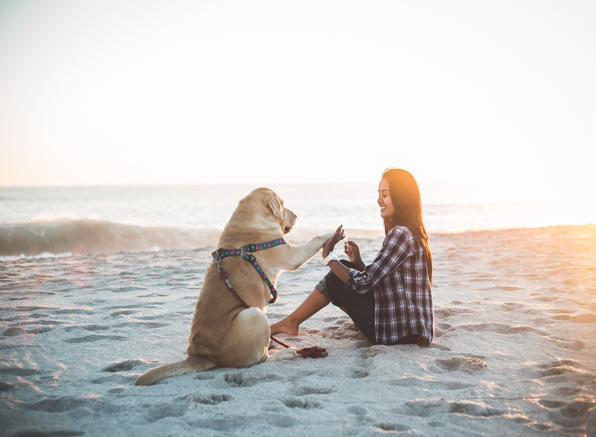

In [3]:
display(raw_image.resize((596, 437)))

In [4]:
question = "how many dogs are in the picture?" #@param {type:"string"}

In [5]:
%%time
inputs = processor(raw_image, question, return_tensors="pt").to('cuda', torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1384: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


one
CPU times: user 1.79 s, sys: 84.4 ms, total: 1.87 s
Wall time: 3.43 s


In [6]:
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")
inputs = processor(raw_image, return_tensors="pt").to('cuda', torch.float16)
generated_ids = model.generate(**inputs, max_new_tokens=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

woman playing with dog on the beach


In [7]:
from google.colab import drive
drive.mount('/content/Drive')


Mounted at /content/Drive


In [8]:
import glob
filenames = glob.glob("/content/Drive/MyDrive/testdata/*.jpg")
filenames.sort()
for image in filenames:
 raw_image = Image.open(image)
 inputs = processor(raw_image, return_tensors="pt").to('cuda', torch.float16)
 generated_ids = model.generate(**inputs, max_new_tokens=20)
 generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
 print(image,generated_text)
 with open('BLIP2.txt', 'a') as fp:
  fp.write(str([image])+str([generated_text]))
  fp.write('\n')

/content/Drive/MyDrive/testdata/File 001.jpg a man standing at a podium
/content/Drive/MyDrive/testdata/File 002.jpg a group of boys sitting at a table with laptops
/content/Drive/MyDrive/testdata/File 003.jpg a group of women sitting around a table
/content/Drive/MyDrive/testdata/File 004.jpg a baby in a high chair
/content/Drive/MyDrive/testdata/File 005.jpg a man and woman sitting on a couch
/content/Drive/MyDrive/testdata/File 006.jpg a tree with leaves
/content/Drive/MyDrive/testdata/File 007.jpg a group of people sitting around a table
/content/Drive/MyDrive/testdata/File 008.jpg a little girl sitting at a table with a stuffed animal
/content/Drive/MyDrive/testdata/File 009.jpg a white and purple plane
/content/Drive/MyDrive/testdata/File 010.jpg a girl is talking on a cell phone
/content/Drive/MyDrive/testdata/File 011.jpg a group of women standing under umbrellas
/content/Drive/MyDrive/testdata/File 012.jpg a young girl sitting on a chair at a desk
/content/Drive/MyDrive/testda